**EC 414 - Spring 2019 - Prof. Kulis - HW 4 - Clustering (K-Means, DP-Means)**



Due Wed. March 27, 2019 - Before class starts.

**Problem 1:  K-Means**

Here you will apply K-Means on simple Gaussian data. You are given some code to guide you in implementing this clustering method.  Use of online code for K-Means is prohibited; use of the built-in scikitlearn function for K-Means is also prohibited. 
    

**(a)** Generate $3$ $2$D Gaussian clusters of data with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-2,2]^T, \boldsymbol{\mu}_3 = [0,-2]^T$,

$\Sigma_1 = [[0.02,0];[0,0.02]]$, $\Sigma_2 = [[0.2,0];[0,0.2]]$, $\Sigma_3 = [[0.05,0];[0,0.05]]$ 

Let each cluster of data have $50$ points. Plot the generated Gaussian data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def scatter_plot(x_axis, y_axis, x_label='', y_label='', color='b', marker='x', name='', title = ''):
    plt.scatter(x_axis, y_axis, c = color, marker = marker ,label = name)
    plt.grid(zorder=0)
    if (title != ''):
        plt.title(title)
    if (x_label != ''):
        plt.xlabel(x_label)
    if (y_label != ''):
        plt.ylabel(y_label)

# Generate 2D Gaussian Data with 3 clusters of 3 different means
# Write code here:
mean_one = np.array([2,2])
mean_two = np.array([-2,2])
mean_three = np.array([0,-2])
covariance_one = np.array([[0.02,0],[0,0.02]])
covariance_two = np.array([[0.2,0],[0,0.2]])
covariance_three = np.array([[0.05,0],[0,0.05]])

one = np.random.multivariate_normal(mean_one, covariance_one, 50)
two = np.random.multivariate_normal(mean_two, covariance_two, 50)
three = np.random.multivariate_normal(mean_three, covariance_three, 50)
# Plotting
# Write code here:
scatter_plot([i[0] for i in one], [i[1] for i in one])
scatter_plot([i[0] for i in two], [i[1] for i in two])
scatter_plot([i[0] for i in three], [i[1] for i in three])
plt.axis('equal')

(-3.480186806752862, 2.601532670903261, -3.0195211471142795, 3.204865485068151)

**(b)** Implement K-Means and apply it to the Gaussian data above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations).  

Iteration:  1
Iteration:  2
Iteration:  3


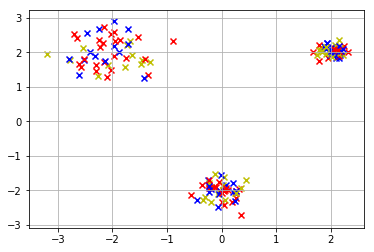

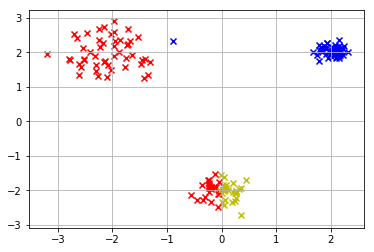

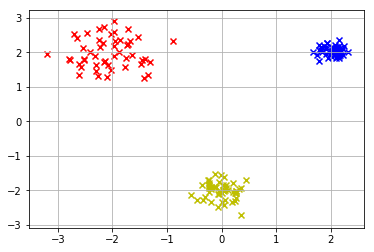

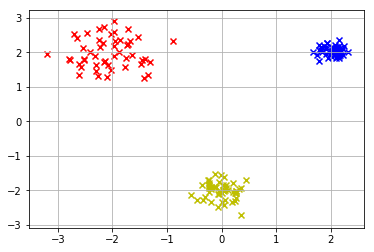

In [2]:
## K-Means implementation:

num_clusters = 3

### CODE 1 - Randomly initialize 3 means: ###
## Write code below here:
cluster_mean = np.zeros((num_clusters,2))
# for i in range(3):
#     cluster_mean[i] = 2*np.random.rand(1,2)
DATA = np.concatenate((one ,two ,three))
# ##############################################
# initializations
labels = np.ones((DATA.shape[0],1),dtype=np.int8)
converged = 0
iteration = 0
convergence_threshold = 2

for i in range(DATA.shape[0]):
    labels[i][0] = np.random.randint(1,4)
init_num = np.zeros(3)
init_tmp_mean = np.zeros((3,2))

for i in range(DATA.shape[0]):
    if (labels[i][0] == 1):
        init_num[0] += 1
        init_tmp_mean[0] += DATA[i]
    elif (labels[i][0] == 2):
        init_num[1] += 1
        init_tmp_mean[1] += DATA[i]
    else:
        init_num[2] += 1
        init_tmp_mean[2] += DATA[i]
    
for i in range(3):
    init_tmp_mean[i] /= init_num[i]
    cluster_mean = init_tmp_mean

plt.figure(1)
for i in range(DATA.shape[0]):
    if (labels[i][0] == 1):
        scatter_plot(DATA[i][0], DATA[i][1], color = 'b')
    elif (labels[i][0] == 2):
        scatter_plot(DATA[i][0], DATA[i][1], color = 'r')
    else:
        scatter_plot(DATA[i][0], DATA[i][1], color = 'y')
            
while (converged==0):
    iteration += 1
    print('Iteration: ',iteration)
    
    objective = 0
    for i in range(DATA.shape[0]):
        objective += (DATA[i][0] - cluster_mean[labels[i][0]-1][0])**2 + (DATA[i][1] - cluster_mean[labels[i][0]-1][1])**2
    ### CODE 2 - Assignment Step - Assign each data observation to the cluster with the nearest mean: ###
    ## Write code below here:
    for i in range(DATA.shape[0]):
        distance = (DATA[i][0] - cluster_mean[0][0])**2 + (DATA[i][1] - cluster_mean[0][1])**2
        cluster_id = 1
        for j in range(2):
            tmp_distance = (DATA[i][0] - cluster_mean[j+1][0])**2 + (DATA[i][1] - cluster_mean[j+1][1])**2
            if (tmp_distance < distance):
                distance = tmp_distance
                cluster_id = j+2
        labels[i][0] = cluster_id
    
    ###################################################################
    
    
    ### CODE 3 - Mean Updating - Update the cluster means ###
    ## Write code below here:
    num = np.zeros(3)
    tmp_mean = np.zeros((3,2))
    for i in range(DATA.shape[0]):
        if (labels[i][0] == 1):
            num[0] += 1
            tmp_mean[0] += DATA[i]
        elif (labels[i][0] == 2):
            num[1] += 1
            tmp_mean[1] += DATA[i]
        else:
            num[2] += 1
            tmp_mean[2] += DATA[i]
    for i in range(3):
        tmp_mean[i] /= num[i]
    cluster_mean = tmp_mean
    
    ###########################################################
    
    ### CODE 4 - Check for convergence ###
    ## Write code below here:
    new_objective = 0

    for i in range(DATA.shape[0]):
        new_objective += (DATA[i][0] - cluster_mean[labels[i][0]-1][0])**2 + (DATA[i][1] - cluster_mean[labels[i][0]-1][1])**2
    if ( abs(new_objective - objective) < convergence_threshold):
        converged=1
    
    #############################################################
    
    ### CODE 5 - Plot clustering results after each iteration: ###
    ## Write code below here:
    plt.figure(iteration+2)
    for i in range(DATA.shape[0]):
        if (labels[i][0] == 1):
            scatter_plot(DATA[i][0], DATA[i][1], color = 'b')
        elif (labels[i][0] == 2):
            scatter_plot(DATA[i][0], DATA[i][1], color = 'r')
        else:
            scatter_plot(DATA[i][0], DATA[i][1], color = 'y')

    
    ###################################################################



**Problem 2: DP Means**

Here, you will implement DP-Means and test it out on National Basketball Association (NBA) data from the 2018-2019 season (currently ongoing season).



**(a)** Describe what the $\lambda$ parameter does in the DP-Means algorithm discussed in class. 

**(b)** Read in the NBA data from the ''NBA_stats_2018_2019.xlsx'' file and plot the Minutes Per Game (MPG) vs Points Per Game (PPG) statistics for all NBA players (a player is represented by a row of the data).  

a.
<br>
$\lambda$ penalize big number of clusters and add more clusters if and only if nthe smallest distance is greater than lambda. Thus, $\lambda$ elinminate the need to predefine the number of clusters.

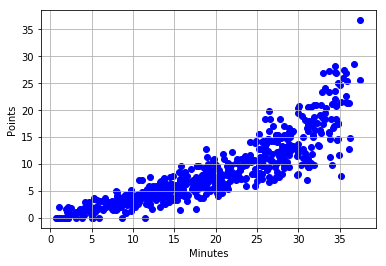

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

################################
## Load data from spreadsheet ##
################################
nba_stats = pd.read_excel('NBA_stats_2018_2019.xlsx', index_col = 0)
# Write code here
############################
MPG = nba_stats['MPG']
PPG = nba_stats['PPG']
## Plot data - MPG vs PPG ##
############################
scatter_plot(MPG, PPG, x_label='Minutes', y_label='Points', color='b', marker='o')
# Write code here

**(c)** Implement DP-Means and apply it to the $2$D (MPG, PPG) NBA data obtained above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. Use of online code for DP-Means is prohibited; use of any Python built-in function for DP-Means is also prohibited. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations) and the number of existing clusters also stays the same.  

In [57]:
## DP-Means Implementation: ##

# Parameter Initializations
LAMBDA = 8
convergence_threshold = 1

### DP Means - Initializations for algorithm ###
# cluster count
K = 1
num_points = MPG.shape[0]
# sets of points that make up clusters
L = np.zeros((num_points,2))
# L.append(range(num_points))
for i in range(num_points):
    L[i][0] = MPG[i]
    L[i][1] = PPG[i]
# Class indicators/labels
Z = np.ones((1,num_points))

# means
MU = []
MU.append(np.mean(L,axis=0))
################################################

# Initializations for algorithm:
converged = 0
t = 0
while converged == 0:
    t += 1
    print('Current iteration: ',t)
    
    ## Per Data Point: ##
    for i in np.arange(num_points):
        
        ### CODE 1 - Calculate distance from current point to all currently existing clusters ###
        ## Write code below here:
        distance = []
        for j in range(K):
            current_distance = (L[j][0] - MU[j][0])**2 + (L[j][1] - MU[j][1])**2
            distance.append(current_distance)
        
        #########################################################################################
        
        
        ### CODE 2 - Look at how the min distance of the cluster distance list compares to LAMBDA ###
        ## Write code below here:
        min_distance = min(distance)
        if ( min_distance > LAMBDA):
            # make new cluster solely consisting of the new point
            K++
            Z[i] = K
        else:
            # assign point to the closest cluster
            Z[i] = distance.index(min_distance)
        #############################################################################################
    
    ### CODE 3 - Form new sets of points (clusters) ###
    ## Write code below here:

    
    ##################################################################
    
    ### CODE 4 - Recompute means per cluster ###
    ## Write code below here:

    
    ####################################################
    
    ### CODE 5 - Plot clustered data per iteration ###
    ## Write code below here:

    
    ##########################################################
    
    ### CODE 6 - Test for convergence: number of clusters doesn't change and means stay the same ###
    ## Write code below here:
    
    if (_______):
        converged = 1
    else:
        converged = 0
    ####################################################





Current iteration:  1
Current iteration:  2
Current iteration:  3
Current iteration:  4
Current iteration:  5
Current iteration:  6
Current iteration:  7
Current iteration:  8
Current iteration:  9
Current iteration:  10
Current iteration:  11
Current iteration:  12
Current iteration:  13
Current iteration:  14
Current iteration:  15
Current iteration:  16
Current iteration:  17
Current iteration:  18
Current iteration:  19
Current iteration:  20
Current iteration:  21
Current iteration:  22
Current iteration:  23
Current iteration:  24
Current iteration:  25
Current iteration:  26
Current iteration:  27
Current iteration:  28
Current iteration:  29
Current iteration:  30
Current iteration:  31
Current iteration:  32
Current iteration:  33
Current iteration:  34
Current iteration:  35
Current iteration:  36
Current iteration:  37
Current iteration:  38
Current iteration:  39
Current iteration:  40
Current iteration:  41
Current iteration:  42
Current iteration:  43
Current iteration:  

Current iteration:  380
Current iteration:  381
Current iteration:  382
Current iteration:  383
Current iteration:  384
Current iteration:  385
Current iteration:  386
Current iteration:  387
Current iteration:  388
Current iteration:  389
Current iteration:  390
Current iteration:  391
Current iteration:  392
Current iteration:  393
Current iteration:  394
Current iteration:  395
Current iteration:  396
Current iteration:  397
Current iteration:  398
Current iteration:  399
Current iteration:  400
Current iteration:  401
Current iteration:  402
Current iteration:  403
Current iteration:  404
Current iteration:  405
Current iteration:  406
Current iteration:  407
Current iteration:  408
Current iteration:  409
Current iteration:  410
Current iteration:  411
Current iteration:  412
Current iteration:  413
Current iteration:  414
Current iteration:  415
Current iteration:  416
Current iteration:  417
Current iteration:  418
Current iteration:  419
Current iteration:  420
Current iteratio

Current iteration:  878
Current iteration:  879
Current iteration:  880
Current iteration:  881
Current iteration:  882
Current iteration:  883
Current iteration:  884
Current iteration:  885
Current iteration:  886
Current iteration:  887
Current iteration:  888
Current iteration:  889
Current iteration:  890
Current iteration:  891
Current iteration:  892
Current iteration:  893
Current iteration:  894
Current iteration:  895
Current iteration:  896
Current iteration:  897
Current iteration:  898
Current iteration:  899
Current iteration:  900
Current iteration:  901
Current iteration:  902
Current iteration:  903
Current iteration:  904
Current iteration:  905
Current iteration:  906
Current iteration:  907
Current iteration:  908
Current iteration:  909
Current iteration:  910
Current iteration:  911
Current iteration:  912
Current iteration:  913
Current iteration:  914
Current iteration:  915
Current iteration:  916
Current iteration:  917
Current iteration:  918
Current iteratio

Current iteration:  1248
Current iteration:  1249
Current iteration:  1250
Current iteration:  1251
Current iteration:  1252
Current iteration:  1253
Current iteration:  1254
Current iteration:  1255
Current iteration:  1256
Current iteration:  1257
Current iteration:  1258
Current iteration:  1259
Current iteration:  1260
Current iteration:  1261
Current iteration:  1262
Current iteration:  1263
Current iteration:  1264
Current iteration:  1265
Current iteration:  1266
Current iteration:  1267
Current iteration:  1268
Current iteration:  1269
Current iteration:  1270
Current iteration:  1271
Current iteration:  1272
Current iteration:  1273
Current iteration:  1274
Current iteration:  1275
Current iteration:  1276
Current iteration:  1277
Current iteration:  1278
Current iteration:  1279
Current iteration:  1280
Current iteration:  1281
Current iteration:  1282
Current iteration:  1283
Current iteration:  1284
Current iteration:  1285
Current iteration:  1286
Current iteration:  1287


Current iteration:  1710
Current iteration:  1711
Current iteration:  1712
Current iteration:  1713
Current iteration:  1714
Current iteration:  1715
Current iteration:  1716
Current iteration:  1717
Current iteration:  1718
Current iteration:  1719
Current iteration:  1720
Current iteration:  1721
Current iteration:  1722
Current iteration:  1723
Current iteration:  1724
Current iteration:  1725
Current iteration:  1726
Current iteration:  1727
Current iteration:  1728
Current iteration:  1729
Current iteration:  1730
Current iteration:  1731
Current iteration:  1732
Current iteration:  1733
Current iteration:  1734
Current iteration:  1735
Current iteration:  1736
Current iteration:  1737
Current iteration:  1738
Current iteration:  1739
Current iteration:  1740
Current iteration:  1741
Current iteration:  1742
Current iteration:  1743
Current iteration:  1744
Current iteration:  1745
Current iteration:  1746
Current iteration:  1747
Current iteration:  1748
Current iteration:  1749


Current iteration:  2096
Current iteration:  2097
Current iteration:  2098
Current iteration:  2099
Current iteration:  2100
Current iteration:  2101
Current iteration:  2102
Current iteration:  2103
Current iteration:  2104
Current iteration:  2105
Current iteration:  2106
Current iteration:  2107
Current iteration:  2108
Current iteration:  2109
Current iteration:  2110
Current iteration:  2111
Current iteration:  2112
Current iteration:  2113
Current iteration:  2114
Current iteration:  2115
Current iteration:  2116
Current iteration:  2117
Current iteration:  2118
Current iteration:  2119
Current iteration:  2120
Current iteration:  2121
Current iteration:  2122
Current iteration:  2123
Current iteration:  2124
Current iteration:  2125
Current iteration:  2126
Current iteration:  2127
Current iteration:  2128
Current iteration:  2129
Current iteration:  2130
Current iteration:  2131
Current iteration:  2132
Current iteration:  2133
Current iteration:  2134
Current iteration:  2135


Current iteration:  2425
Current iteration:  2426
Current iteration:  2427
Current iteration:  2428
Current iteration:  2429
Current iteration:  2430
Current iteration:  2431
Current iteration:  2432
Current iteration:  2433
Current iteration:  2434
Current iteration:  2435
Current iteration:  2436
Current iteration:  2437
Current iteration:  2438
Current iteration:  2439
Current iteration:  2440
Current iteration:  2441
Current iteration:  2442
Current iteration:  2443
Current iteration:  2444
Current iteration:  2445
Current iteration:  2446
Current iteration:  2447
Current iteration:  2448
Current iteration:  2449
Current iteration:  2450
Current iteration:  2451
Current iteration:  2452
Current iteration:  2453
Current iteration:  2454
Current iteration:  2455
Current iteration:  2456
Current iteration:  2457
Current iteration:  2458
Current iteration:  2459
Current iteration:  2460
Current iteration:  2461
Current iteration:  2462
Current iteration:  2463
Current iteration:  2464


Current iteration:  2996
Current iteration:  2997
Current iteration:  2998
Current iteration:  2999
Current iteration:  3000
Current iteration:  3001
Current iteration:  3002
Current iteration:  3003
Current iteration:  3004
Current iteration:  3005
Current iteration:  3006
Current iteration:  3007
Current iteration:  3008
Current iteration:  3009
Current iteration:  3010
Current iteration:  3011
Current iteration:  3012
Current iteration:  3013
Current iteration:  3014
Current iteration:  3015
Current iteration:  3016
Current iteration:  3017
Current iteration:  3018
Current iteration:  3019
Current iteration:  3020
Current iteration:  3021
Current iteration:  3022
Current iteration:  3023
Current iteration:  3024
Current iteration:  3025
Current iteration:  3026
Current iteration:  3027
Current iteration:  3028
Current iteration:  3029
Current iteration:  3030
Current iteration:  3031
Current iteration:  3032
Current iteration:  3033
Current iteration:  3034
Current iteration:  3035


KeyboardInterrupt: 

**(d)** Run the DP-Means code created above for the following $\lambda$ values:

$\underline{\lambda} = [4,10,14,24]$.

 Plot the resulting clusters for each $\lambda$ value and discuss the results.   

In [1]:
# Plotting of results for different lambdas:

print('LAMBDA: 4','\n\n')
##############
# Lambda - 4##
##############

# Write code here

print('LAMBDA: 10','\n\n')
##############
# Lambda - 10#
##############

# Write code here

print('LAMBDA: 14','\n\n')
##############
# Lambda - 14#
##############

# Write code here

print('LAMBDA: 24','\n\n')
##############
# Lambda - 24#
##############

# Write code here



## discussion of results?

LAMBDA: 4 


LAMBDA: 10 


LAMBDA: 14 


LAMBDA: 24 


